## 1. Imports and Data Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

/tmp/ipykernel_9547/3801697496.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


## 2. Data Structure and Quality Assessment

In [3]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

## 3. Descriptive Statistics

In [4]:
# Descriptive statistics for key financial columns
print(df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe())

       TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01         2.255311e+05
std    2.302845e+02  2.384075e+03         5.645157e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.350000e+05
50%    2.178333e+00  0.000000e+00         2.200000e+05
75%    2.192982e+01  0.000000e+00         2.800000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07


## 4. Loss Ratio Analysis

In [5]:
# Calculate Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Overall Loss Ratio
overall_loss_ratio = df['LossRatio'].mean()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")

# Loss Ratio by Province, VehicleType, Gender
print(df.groupby('Province')['LossRatio'].mean())
print(df.groupby('VehicleType')['LossRatio'].mean())
print(df.groupby('Gender')['LossRatio'].mean())

Overall Loss Ratio: nan
Province
Eastern Cape          inf
Free State            inf
Gauteng               NaN
KwaZulu-Natal         inf
Limpopo               inf
Mpumalanga            NaN
North West            inf
Northern Cape    0.203831
Western Cape          inf
Name: LossRatio, dtype: float64
VehicleType
Bus                       inf
Heavy Commercial          inf
Light Commercial     0.543917
Medium Commercial         inf
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64
Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


/home/ashe/Projects/10academy/end-to-end-insurance-analytics/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


## 5. Univariate Analysis & Outlier Detection

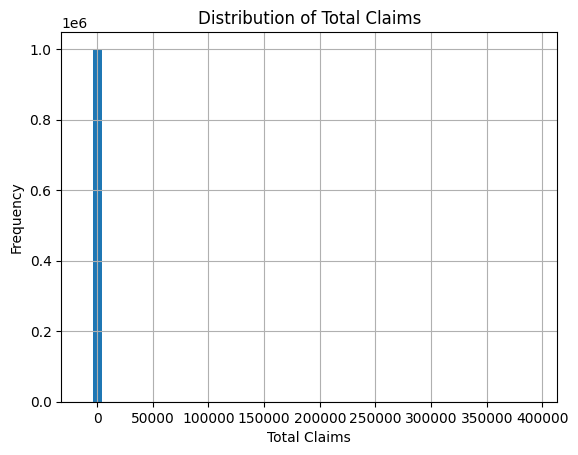

In [6]:
# Histogram for Total Claims
df['TotalClaims'].hist(bins=50)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Frequency')
plt.show()

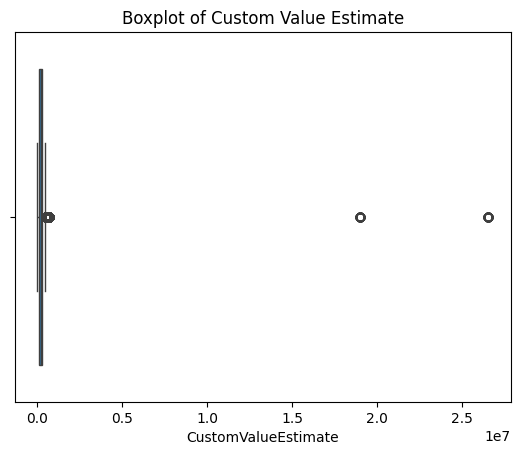

In [7]:
# Boxplot for Custom Value Estimate
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Boxplot of Custom Value Estimate')
plt.show()

## 6. Temporal Trends

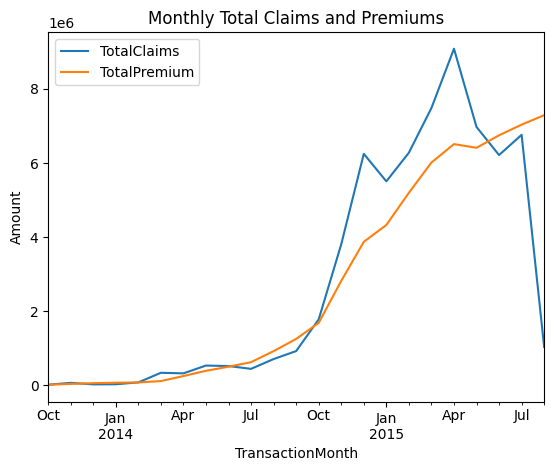

In [8]:
# Convert TransactionMonth to datetime and analyze monthly trends
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({'TotalClaims':'sum', 'TotalPremium':'sum'})
monthly.plot(y=['TotalClaims', 'TotalPremium'])
plt.title('Monthly Total Claims and Premiums')
plt.ylabel('Amount')
plt.show()

## 7. Vehicle Make/Model Analysis

In [9]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims', 'LossRatio'],
      dtype='object')


In [10]:
make_claims = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)
print("Top 5 Makes by Avg Claim:", make_claims.head())
print("Bottom 5 Makes by Avg Claim:", make_claims.tail())

Top 5 Makes by Avg Claim: make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
Name: TotalClaims, dtype: float64
Bottom 5 Makes by Avg Claim: make
OPEL       0.0
RENAULT    0.0
SCANIA     0.0
TATA       0.0
VOLVO      0.0
Name: TotalClaims, dtype: float64


## 8. Bivariate/Multivariate Analysis

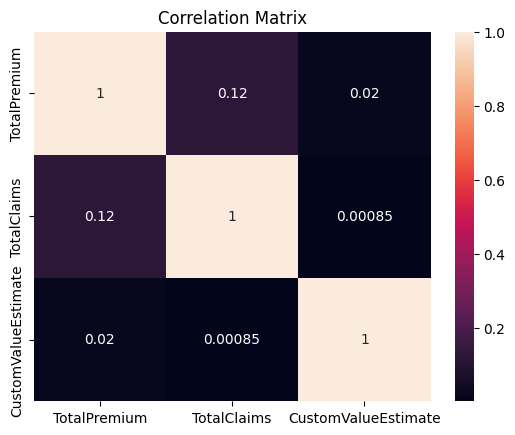

In [11]:
# Correlation matrix
corr = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

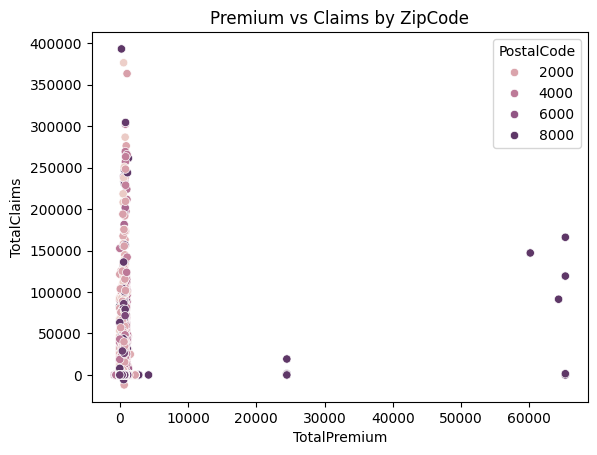

In [12]:
# Scatter plot by ZipCode
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=df)
plt.title('Premium vs Claims by ZipCode')
plt.show()

## 9. Creative Visualizations

### Loss Ratio by Province

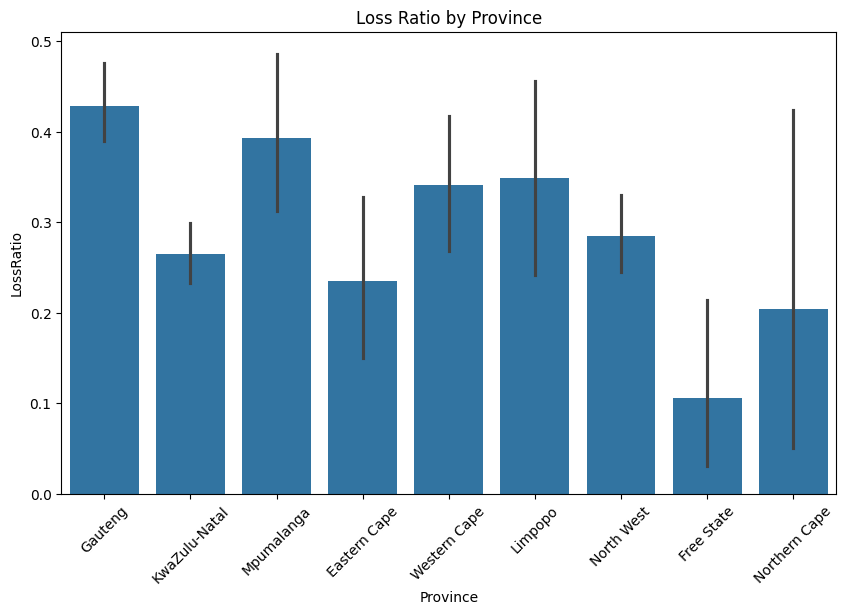

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='Province', y='LossRatio', data=df)
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.show()

### Monthly Claims Trend (Line Plot)

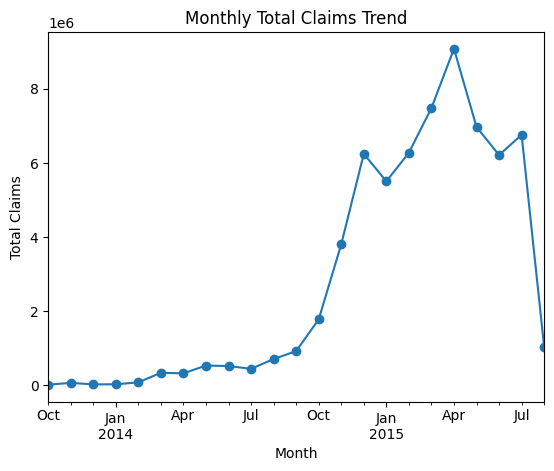

In [14]:
monthly['TotalClaims'].plot(kind='line', marker='o')
plt.title('Monthly Total Claims Trend')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.show()

### Boxplot of Claims by VehicleType

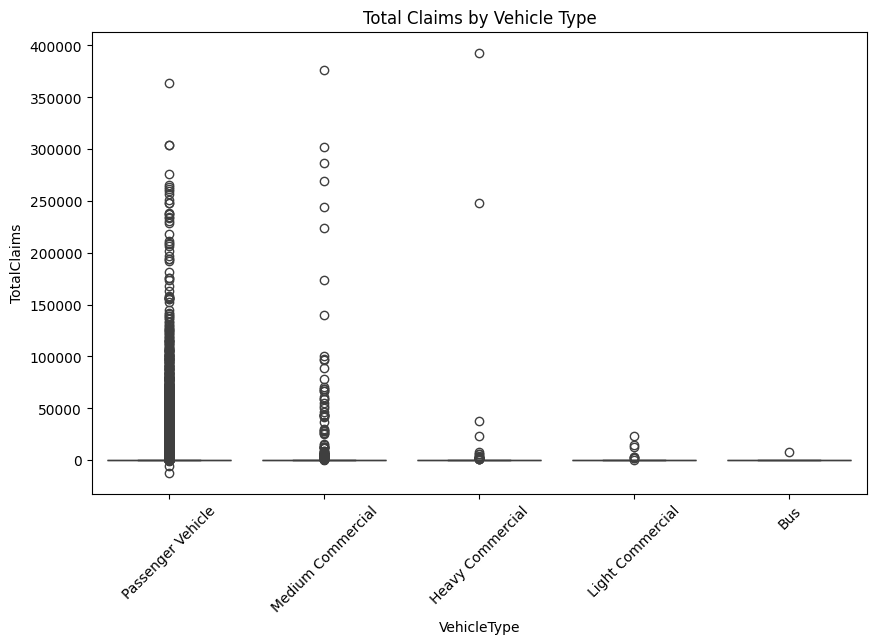

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='VehicleType', y='TotalClaims', data=df)
plt.title('Total Claims by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

### Metric Definitions

- **Claim Frequency:** Proportion of policies with at least one claim (`HasClaim`).
- **Claim Severity:** Average claim amount for policies with at least one claim.
- **Margin:** Difference between total premium and total claims (`Margin = TotalPremium - TotalClaims`).

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

### Load Data

In [20]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [22]:
# Create HasClaim: 1 if TotalClaims > 0, else 0
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)

# Create ClaimAmount: average claim amount per policy with a claim
# If TotalClaims is the sum of all claims for the policy, use it directly for those with claims
df['ClaimAmount'] = df['TotalClaims']  # or adjust if you have claim count

# Use PostalCode as ZipCode
df['ZipCode'] = df['PostalCode']

# Now you can safely run your analysis
assert {'HasClaim', 'ClaimAmount', 'TotalPremium', 'TotalClaims', 'Gender', 'ZipCode', 'Province'}.issubset(df.columns)

### Calculate Metrics

In [23]:
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

claim_frequency = df['HasClaim'].mean()
claim_severity = df[df['HasClaim'] == 1]['ClaimAmount'].mean()
avg_margin = df['Margin'].mean()

print(f"Overall Claim Frequency: {claim_frequency:.2%}")
print(f"Overall Claim Severity: {claim_severity:.2f}")
print(f"Overall Average Margin: {avg_margin:.2f}")

Overall Claim Frequency: 0.28%
Overall Claim Severity: 23273.39
Overall Average Margin: -2.96


## Data Segmentation

We segment the data by Gender, Province, and Zip Code to compare KPIs across groups.

###  Segmentation by Gender, Province, Zip Code

In [24]:
# By Gender
gender_group = df.groupby('Gender').agg(
    ClaimFrequency=('HasClaim', 'mean'),
    ClaimSeverity=('ClaimAmount', lambda x: x[df.loc[x.index, 'HasClaim'] == 1].mean()),
    AvgMargin=('Margin', 'mean'),
    Count=('HasClaim', 'count')
)
print("Metrics by Gender:\n", gender_group)

# By Province
province_group = df.groupby('Province').agg(
    ClaimFrequency=('HasClaim', 'mean'),
    ClaimSeverity=('ClaimAmount', lambda x: x[df.loc[x.index, 'HasClaim'] == 1].mean()),
    AvgMargin=('Margin', 'mean'),
    Count=('HasClaim', 'count')
)
print("\nMetrics by Province:\n", province_group)

# By Zip Code (show top 5 by count)
zip_group = df.groupby('ZipCode').agg(
    ClaimFrequency=('HasClaim', 'mean'),
    ClaimSeverity=('ClaimAmount', lambda x: x[df.loc[x.index, 'HasClaim'] == 1].mean()),
    AvgMargin=('Margin', 'mean'),
    Count=('HasClaim', 'count')
).sort_values('Count', ascending=False).head(5)
print("\nMetrics by Top 5 Zip Codes:\n", zip_group)

Metrics by Gender:
                ClaimFrequency  ClaimSeverity  AvgMargin   Count
Gender                                                         
Female               0.002073   17874.721303   8.028787    6755
Male                 0.002195   14858.552294   4.284253   42817
Not specified        0.002833   23530.667678  -3.731550  940990

Metrics by Province:
                ClaimFrequency  ClaimSeverity  AvgMargin   Count
Province                                                       
Eastern Cape         0.001648   27128.533277  25.833240   30336
Free State           0.001358   32265.661085  20.550805    8099
Gauteng              0.003356   22243.878396 -13.558894  393865
KwaZulu-Natal        0.002845   29609.487473  -6.433598  169781
Limpopo              0.002698   15171.294187  20.971484   24836
Mpumalanga           0.002428   15979.553421  15.016059   52718
North West           0.002436   16963.467035  10.958832  143287
Northern Cape        0.001254   11186.313596  35.590527    63

## Statistical Test Results

We test the following hypotheses:
- No risk differences across provinces (Claim Frequency)
- No risk differences between zip codes (Claim Frequency)
- No significant margin difference between zip codes
- No significant risk difference between Women and Men (Claim Frequency)

### Statistical Tests

In [26]:
# Province vs Claim Frequency
contingency_prov = pd.crosstab(df['Province'], df['HasClaim'])
chi2_prov, p_prov, _, _ = chi2_contingency(contingency_prov)
print(f"Chi-squared test (Province vs Claim Frequency) p-value: {p_prov:.4f}")

# Top 2 Zip Codes vs Claim Frequency
top_zips = df['ZipCode'].value_counts().index[:2]
contingency_zip = pd.crosstab(df[df['ZipCode'].isin(top_zips)]['ZipCode'], df[df['ZipCode'].isin(top_zips)]['HasClaim'])
chi2_zip, p_zip, _, _ = chi2_contingency(contingency_zip)
print(f"Chi-squared test (Top 2 Zip Codes vs Claim Frequency) p-value: {p_zip:.4f}")

# Margin difference between top 2 zip codes
margin_a = df[df['ZipCode'] == top_zips[0]]['Margin']
margin_b = df[df['ZipCode'] == top_zips[1]]['Margin']
t_stat_margin, p_margin = ttest_ind(margin_a, margin_b, equal_var=False)
print(f"T-test (Margin, Top 2 Zip Codes) p-value: {p_margin:.4f}")

# Gender vs Claim Frequency
contingency_gender = pd.crosstab(df['Gender'], df['HasClaim'])
chi2_gender, p_gender, _, _ = chi2_contingency(contingency_gender)
print(f"Chi-squared test (Gender vs Claim Frequency) p-value: {p_gender:.4f}")

Chi-squared test (Province vs Claim Frequency) p-value: 0.0000
Chi-squared test (Top 2 Zip Codes vs Claim Frequency) p-value: 0.0579
T-test (Margin, Top 2 Zip Codes) p-value: 0.2445
Chi-squared test (Gender vs Claim Frequency) p-value: 0.0266


## Visualizations

We visualize KPI comparisons between groups.

### Claim Frequency by Province

/tmp/ipykernel_9547/2473975515.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='HasClaim', data=df, estimator=np.mean, ci=None)


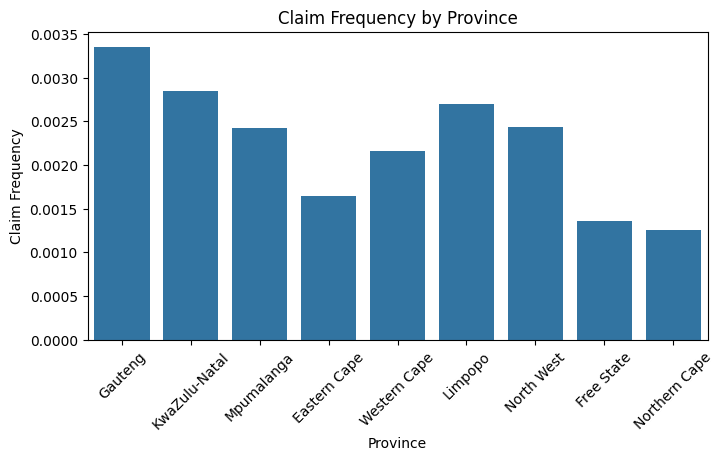

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(x='Province', y='HasClaim', data=df, estimator=np.mean, ci=None)
plt.title('Claim Frequency by Province')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.show()

### Claim Severity by Gender

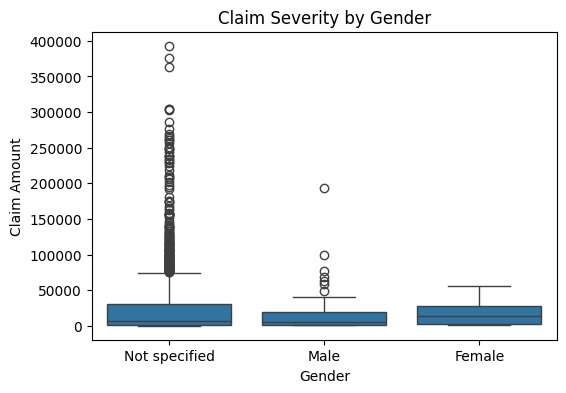

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='ClaimAmount', data=df[df['HasClaim'] == 1])
plt.title('Claim Severity by Gender')
plt.ylabel('Claim Amount')
plt.show()

### Margin by Top 2 Zip Codes

/tmp/ipykernel_9547/2930159159.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ZipCode', y='Margin', data=df[df['ZipCode'].isin(top_zips)], estimator=np.mean, ci=None)


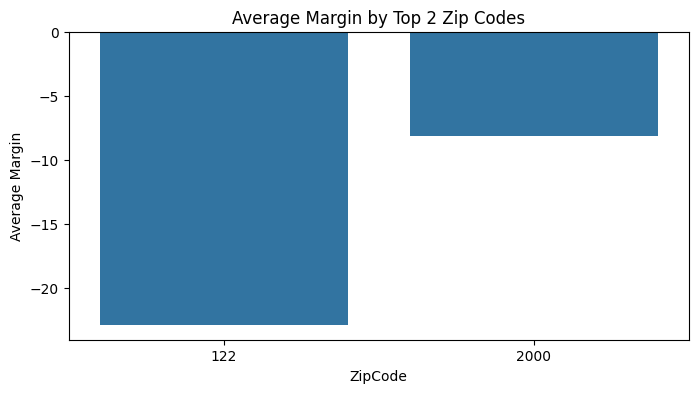

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(x='ZipCode', y='Margin', data=df[df['ZipCode'].isin(top_zips)], estimator=np.mean, ci=None)
plt.title('Average Margin by Top 2 Zip Codes')
plt.ylabel('Average Margin')
plt.show()

### Claim Frequency by Gender

/tmp/ipykernel_9547/103290686.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='HasClaim', data=df, estimator=np.mean, ci=None)


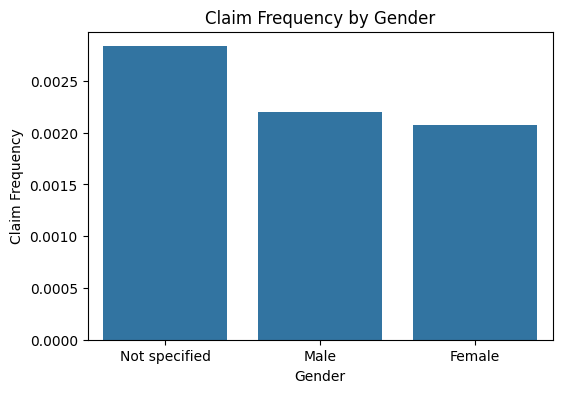

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='HasClaim', data=df, estimator=np.mean, ci=None)
plt.title('Claim Frequency by Gender')
plt.ylabel('Claim Frequency')
plt.show()

# Machine Learning Engineering

## 1. Data Preparation

### Imports

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Data Filtering and Feature Engineering

In [34]:
# Filter for policies with claims > 0
df_severity = df[df['ClaimAmount'] > 0].copy()

# Feature engineering examples
if 'TransactionMonth' in df_severity.columns and 'RegistrationYear' in df_severity.columns:
    df_severity['PolicyAge'] = pd.to_datetime(df_severity['TransactionMonth'], errors='coerce').dt.year - df_severity['RegistrationYear']
    df_severity['PolicyAge'] = df_severity['PolicyAge'].fillna(df_severity['PolicyAge'].median())
if 'TotalClaims' in df_severity.columns and 'TotalPremium' in df_severity.columns:
    df_severity['ClaimsToPremiumRatio'] = df_severity['TotalClaims'] / (df_severity['TotalPremium'] + 1e-6)

### Handle Missing Data

In [35]:
# Drop rows with missing target or features
df_severity = df_severity.dropna(subset=['ClaimAmount'])
df_severity = df_severity.dropna(axis=0)

## Feature Selection and Encoding

In [36]:
# Select features (example: numeric + categorical)
features = df_severity.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = ['Gender', 'Province', 'Product', 'CoverType']
for col in cat_cols:
    if col in df_severity.columns and col not in features:
        features.append(col)
features = [f for f in features if f != 'ClaimAmount']

X = df_severity[features].copy()
y = df_severity['ClaimAmount']

# Encode categorical variables (Label encoding)
for col in cat_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

## Train/Test Split

In [42]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Any nulls in X?", X.isnull().any().any())
print("Any nulls in y?", y.isnull().any())
print("First few rows of X:\n", X.head())
print("First few rows of y:\n", y.head())

X shape: (0, 24)
y shape: (0,)
Any nulls in X? False
Any nulls in y? False
First few rows of X:
 Empty DataFrame
Columns: [UnderwrittenCoverID, PolicyID, PostalCode, mmcode, RegistrationYear, Cylinders, cubiccapacity, kilowatts, NumberOfDoors, CustomValueEstimate, NumberOfVehiclesInFleet, SumInsured, CalculatedPremiumPerTerm, TotalPremium, TotalClaims, HasClaim, ZipCode, Margin, PolicyAge, ClaimsToPremiumRatio, Gender, Province, Product, CoverType]
Index: []

[0 rows x 24 columns]
First few rows of y:
 Series([], Name: ClaimAmount, dtype: float64)


### Imports

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Machine Learning

### Imports

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier

### Regression Model Training Function

In [ ]:
def build_regression_models(X_train, y_train):
    """
    Train regression models for claim severity prediction.
    Returns trained Linear Regression, Random Forest, and XGBoost regressors.
    """
    models = {}

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    models['linear_regression'] = lr

    # Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    models['random_forest'] = rf

    # XGBoost Regressor
    xgb = XGBRegressor(random_state=42, verbosity=0)
    xgb.fit(X_train, y_train)
    models['xgboost'] = xgb

    return models

### Classification Model Training Function

In [ ]:
def build_classification_models(X_train, y_train):
    """
    Train classification models for claim occurrence prediction.
    Returns trained Logistic Regression, Random Forest, and XGBoost classifiers.
    """
    models = {}

    # Logistic Regression
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)
    models['logistic_regression'] = logreg

    # Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    models['random_forest'] = rf

    # XGBoost Classifier
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    models['xgboost'] = xgb

    return models